In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the advertising dataset

In [2]:
Data=pd.read_csv('Advertising.csv')
Xdata=Data[['TV','Radio','Newspaper']]

In [3]:
mean=Xdata.mean(axis=0)
var=Xdata.var(axis=0)
data=(Xdata-mean)/var #Normalized data
data['Intercept']=1 #Adding an intercept

### Defininig Functions
Reg, Loss, R2, and Der are functions to calculate regression, loss, R-2 score, and derivative of loss function with respect to the weights.

In [4]:
def Reg(X,W):
    """
    Regressor function. Input is Weights and input data. Output is a linear combination of inputs
    """
    y=X@W
    return y

In [5]:
def Loss(Y,y):
    """
    Least squares approach: Loss Function is the sum of square residuals. 
    """
    return np.sum((y-Y)**2)

In [6]:
def R2(X,W,Y):
    """
    Calculates R2-score
    """
    y=Reg(X,W)
    RSS=Loss(Y,y)
    TSS=Loss(Y,np.mean(Y))
    return 1-(RSS/TSS)

In [7]:
def sigma(X,W,Y):
    """"
    Calculates standard error
    """
    y=Reg(X,W)
    RSS=Loss(Y,y)
    return np.sqrt(RSS/(X.shape[0]-1))
    

covariance matrix $Σ=s^2(X^TX)^−1$ where s^2 is the residual variance

In [8]:
def cov_mat(X,sigma):
    return sigma*np.linalg.inv(X.T@X)

In [9]:
def F_statistic(X,W,Y):
    """
    Calculates F-statistics
    """
    y=Reg(X,W)
    RSS=Loss(Y,y)
    TSS=Loss(Y,np.mean(Y))
    n=X.shape[0]
    p=X.shape[1]
    return (TSS-RSS)*(n-p-1)/(p*RSS)

In [10]:
def Der(Y,y,X):
    """
    Derivative of loss function with respect to the weights.
    """
    return X.T@(y-Y)

To compute the standard errors
associated with β0 and β1, we use the following formulas:

$SE(β0)^2= σ^2[1/n+\overline x^2/\Sigma(x_i-\overline x)^2]$

$SE(β1)^2= σ^2[1/\Sigma(x_i-\overline x)^2]$


Test the functions

In [12]:
a= np.array([[[1,2], [4,5]], [[1,2], [2,2]], [[1,2], [2,3]], [[1,2], [5,5]]])
w=np.array([[1, 2],[2,2]])
y=Reg(a,w)
y.shape

(4, 2, 2)

In [134]:
a=np.array([[1,2],[3,4],[5,6]])
w=np.array([[7],[8]])
b=np.array([[1],[1],[1]])
print(a.shape,w.shape,b.shape)
y=Reg(a,w)
y.shape
Y=[[3],[4],[5]]
Loss(Y,y)
Der(Y,y,a).shape

(3, 2) (2, 1) (3, 1)


(2, 1)

### Run a simple linear regression on sales and newspaper advertising.

In [135]:
X=data[['Intercept','Newspaper']].as_matrix()
Y=Data[['Sales']].as_matrix()
Y.mean
W=np.random.rand(X.shape[1],1)
max_iteration=500000
alpha=0.001
Cost=[]

for i in range(max_iteration):
    y=Reg(X,W)
    Cost.append(Loss(Y,y))
    dW=Der(Y,y,X)
    W=W-alpha*dW

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


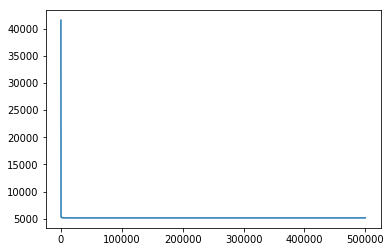

In [136]:
Cost_Newspaper=Cost
W_Newspaper=W
plt.plot(Cost_Newspaper)

### Plot Sales vs Newspaper and overlay the predicted relationship.

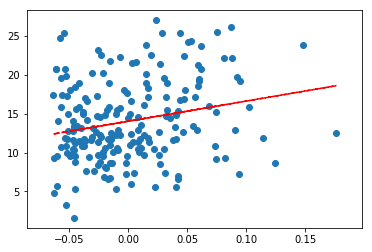

In [137]:
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Reg(X,W_Newspaper), 'r--')

### Is there a significant relationship? What do the p-values represent statistically?

Large F-statistic suggests that at least one of the advertising media must
be related to sales. When n is large, an F-statistic that is just a
little larger than 1 might still provide evidence against null
hypothesis (H0 : β1 = β2 = · · · = βp = 0). In contrast,
a larger F-statistic is needed to reject H0 if n is small.

In [138]:
F_stat=F_statistic(X,W,Y)
F_stat

5.416156358252168

We find F_statistic of 5.41 for the normalized data showing that there is a relationship between newspaper adds and sales

In [139]:
R2(X,W,Y)

0.05212044544430516

R-square value tells you how much variation is explained by your model. So 0.05 R-square means that your model explains 5% of variation within the data. The greater R-square the better the model. 

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. ... Typically, you use the coefficient p-values to determine which terms to keep in the regression model. So if the p-value is less than the significance level (usually 0.05) then your model fits the data well.
Thus you have four scenarios:
1) low R-square and low p-value (p-value <= 0.05)
2) low R-square and high p-value (p-value > 0.05)
3) high R-square and low p-value
4) high R-square and high p-value
Interpretation:
1) means that your model doesn't explain much of variation of the data but it is significant (better than not having a model)
2) means that your model doesn't explain much of variation of the data and it is not significant (worst scenario)
3) means your model explains a lot of variation within the data and is significant (best scenario)
4) means that your model explains a lot of variation within the data but is not significant (model is worthless)

### Calculating the p-values

In [140]:
import statsmodels.api as sm
mod = sm.OLS(Y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [141]:
p_values

const    9.363543e-95
x1       1.148196e-03
Name: P>|t|, dtype: float64

In [152]:
si=sigma(X,W,Y)
E=cov_mat(X,si)
for i in range(E.shape[0]):
    print(E[i,i], 'is the error of coefficient', W[i][0])

0.025398345374310436 is the error of coefficient 14.022499999999997
12.107182581120027 is the error of coefficient 25.941391959794775


### Run a multiple linear regression on sales and all three advertising media.

In [153]:
X=data[['Intercept','Newspaper','TV','Radio']].as_matrix()
Y=Data[['Sales']].as_matrix()
Y_mean=np.mean(Y)
W=np.random.rand(X.shape[1],1)
max_iteration=500000
alpha=0.001
Cost=[]


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [154]:
for i in range(max_iteration):
    y=Reg(X,W)
    Cost.append(Loss(Y,y))
    dW=Der(Y,y,X)
    W=W-alpha*dW

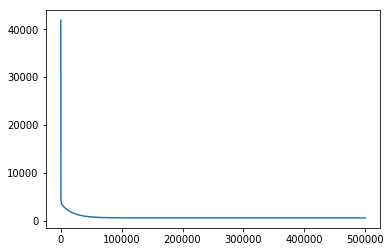

In [155]:
plt.plot(Cost)

In [156]:
W

array([[ 14.0225    ],
       [ -0.49208592],
       [337.32841652],
       [ 41.55724946]])

In [157]:
a=X.T@X
b=np.linalg.inv(a)@X.T
ww=b@Y

In [158]:
ww

array([[ 14.0225    ],
       [ -0.49209159],
       [337.32890853],
       [ 41.55724606]])

In [159]:
mod = sm.OLS(Y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

const    9.153929e-184
x1        8.599151e-01
x2        1.509960e-81
x3        1.505339e-54
Name: P>|t|, dtype: float64

In [167]:
si=sigma(X,W,Y)
E=cov_mat(X,si)
for i in range(E.shape[0]):
    print(E[i,i], 'is the error of coefficient', W[i][0])
    print('[', W[i][0]-2*E[i,i],',', W[i][0]+2*E[i,i], ']','is 95% confidence interval','\n')

0.008363786371970916 is the error of coefficient 14.0225
[ 14.005772427256058 , 14.039227572743943 ] is 95% confidence interval 

4.565802816965274 is the error of coefficient -0.4920859185534593
[ -9.623691552484006 , 8.639519715377089 ] is 95% confidence interval 

62.24452339484275 is the error of coefficient 337.3284165234077
[ 212.8393697337222 , 461.81746331309324 ] is 95% confidence interval 

2.1214526976932286 is the error of coefficient 41.55724945885319
[ 37.314344063466734 , 45.80015485423965 ] is 95% confidence interval 



Approximately a 95% chance that the interval $[W − 2SE(W), W + 2SE(W)]$

The p-value for the newspaper now is 0.8 which is too large

Confidence intervals tell you how well you have determined a parameter of interest, such as a mean or regression coefficient. For example Assume that the data are randomly sampled from a Gaussian distribution and you are interested in determining the mean. If you sample many times, and calculate a confidence interval of the mean from each sample, you'd expect 95% of those intervals to include the true value of the population mean. 

Prediction intervals tell you where you can expect to see the next data point sampled

###  What are the assumptions made in the linear regression model with respect to the errors?

1-Assumes a linear relationship between predictors and targets.

2-Assumes error follows a normal distribution.


### Ideally, how should the residual plot look like?

It should appear as normally distributed

In [206]:
res=Y-Reg(X,W)

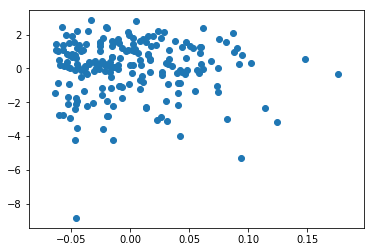

In [216]:
plt.scatter(X[:,1],res)

### Obtain the Q-Q plot and the residual plots for the above linear regression models

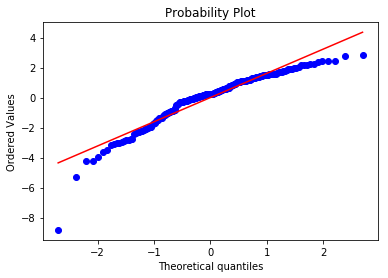

In [215]:
import scipy.stats as stats
A=stats.probplot(res[:,0], dist="norm", plot=plt)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


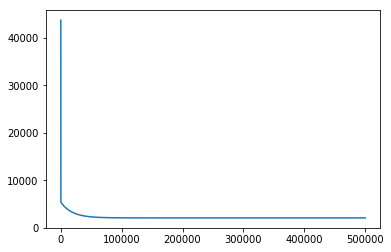

In [339]:
media='TV'
X=data[['Intercept','TV']].as_matrix()
Y=Data[['Sales']].as_matrix()
W=np.random.rand(X.shape[1],1)
max_iteration=500000
lis=np.arange(0, max_iteration,50000)
alpha=0.001
Cost=[]
for i in range(max_iteration):
    y=Reg(W,X)
    Cost.append(Loss(Y,y))
    dW=Der(Y,y,X)
    W=W-alpha*dW
    #if i in lis:
        #plt.scatter(data[[media]].as_matrix(),Y)
        #plt.plot(data[[media]].as_matrix(),y, color='red')
        #plt.pause(0.01)
        #plt.close()
        
        


        
plt.plot(Cost)    

In [346]:
Cost[-1]
W

array([[ 14.0225    ],
       [350.38971416]])

In [368]:
SSres=Loss(Y,y)
SStot=Loss(Y,Y_mean)
R2(SSres,SStot)

0.8972106381777486

In [369]:
from sklearn.linear_model import LinearRegression

In [370]:
model=LinearRegression(normalize=False)
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [371]:
model.score(X,Y)

0.8972106381789521

In [372]:
re=(Y-y)


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  3.,  1.,  3.,
         2.,  0.,  0.,  3.,  3.,  3.,  3.,  1.,  2.,  1.,  1.,  3.,  2.,
         3.,  4.,  3.,  4.,  1.,  0.,  3.,  4.,  7.,  6.,  9.,  7., 13.,
         5.,  7.,  8.,  3.,  5.,  4.,  9.,  7.,  6.,  6.,  7.,  7.,  4.,
         2.,  5.,  1.,  5.,  1.,  3.,  0.,  0.,  2.]),
 array([-8.82769687, -8.71112772, -8.59455857, -8.47798941, -8.36142026,
        -8.24485111, -8.12828195, -8.0117128 , -7.89514365, -7.7785745 ,
        -7.66200534, -7.54543619, -7.42886704, -7.31229788, -7.19572873,
        -7.07915958, -6.96259043, -6.84602127, -6.72945212, -6.61288297,
        -6.49631381, -6.37974466, -6.26317551, -6.14660636, -6.0300372 ,
        -5.91346805, -5.7968989 , -5.68032974, -5.56376059, -5.447191

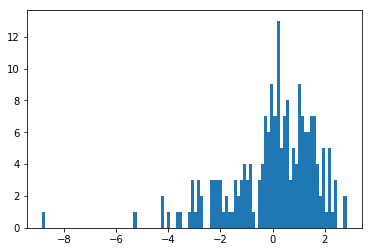

In [373]:
plt.hist(re, bins=100)